In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

In [6]:
%pwd

'/home/fjn197_alumni_ku_dk/modi_mount/CT_Reconstruction'

In [23]:
Data_par = []
res_dir = "/home/fjn197_alumni_ku_dk/modi_mount/CT_Reconstruction/results"
for file in os.listdir(res_dir):
    if file.startswith("slurm_parallel"):
        with open(res_dir+'/'+file, 'r') as f:
            data = f.read()
            Data_par.append(data)
            #print(file)

In [24]:
Data_seq = []
for file in os.listdir(
    "/home/fjn197_alumni_ku_dk/modi_mount/CT_Reconstruction/results"):
    if file.startswith("slurm_sequential"):
        with open(res_dir+'/'+file, 'r') as f:
            data = f.read()
            Data_seq.append(data)
            #print(file)

In [71]:
num_files_seq = len(Data_seq)
Columns = ['Nvox','Nprocs', 'Nthreads', 'Nnodes', 
           'Ttotal', 'Tread', 'Tcomp', 'Twrite',
          'Par'] 
df = pd.DataFrame(columns=Columns)
for i in range(num_files_seq):
    Nprocs = 1#float(re.search('rank 0 out of (.*)\n', Data_seq[i]).group(1))
    Nthreads = 1#float(re.search('rank 0 out of (.*)\n', Data_seq[i]).group(1))
    Nnodes = 1
    Nvox = int(re.search('num_voxels=(.*)', Data_seq[i]).group(1))
    Ttot = float(re.search('elapsed time: (.*) sec', Data_seq[i]).group(1))
    Tread = float(re.search('reading time: (.*) sec', Data_seq[i]).group(1))
    Tcomp = float(re.search('computation time: (.*) sec', Data_seq[i]).group(1))
    Twrite = float(re.search('writing time: (.*) sec', Data_seq[i]).group(1))
    Values = [Nvox, Nprocs, Nthreads, Nnodes, 
              Ttot, Tread, Tcomp, Twrite, 0]
    append_dict = dict(zip(Columns, Values))
    df = df.append(append_dict, ignore_index=True)
num_files = len(Data_seq)
Columns = ['Nvox','Nprocs', 'Nthreads', 'Nnodes', 
           'Ttotal', 'Tread', 'Tcomp', 'Twrite',
          'Par'] 
df = pd.DataFrame(columns=Columns)

for i in range(13):
    Nprocs = int(re.search('rank 0 out of (.*).\n', Data_par[i]).group(1))
    Nthreads = int(re.search('Nthreads=(.*)\n', Data_par[i]).group(1))
    Nnodes = len(np.unique(re.findall('modi00(.*).science', Data_par[i])))
    Nvox = int(re.search('Nvoxels=(.*)', Data_par[i]).group(1))
    Ttot = float(re.search('elapsed time: (.*) sec', Data_par[i]).group(1))
    Tread = float(re.search('reading time: (.*) sec', Data_par[i]).group(1))
    Tcomp = float(re.search('computation time: (.*) sec', Data_par[i]).group(1))
    Twrite = float(re.search('writing time: (.*) sec', Data_par[i]).group(1))
    Values = [Nvox, Nprocs, Nthreads, Nnodes, 
              Ttot, Tread, Tcomp, Twrite, 1]
    append_dict = dict(zip(Columns, Values))
    df = df.append(append_dict, ignore_index=True)
#np.savetxt('strong_scaling.txt', Data_write)
#df
#np.savetxt('strong_scaling.txt', Data_write)
df

,Nvox,Nprocs,Nthreads,Nnodes,Ttotal,Tread,Tcomp,Twrite,Par
0,64.0,1.0,1.0,1.0,8.78127,6.53987,2.195690,0.000004,1.0
1,128.0,2.0,4.0,1.0,4.10571,1.86541,2.194930,0.000006,1.0
2,128.0,8.0,16.0,2.0,2.09957,1.74861,0.255982,0.000007,1.0
3,256.0,2.0,16.0,1.0,4.61953,1.63959,2.888910,0.000009,1.0
4,128.0,2.0,16.0,1.0,2.94040,1.75835,1.141250,0.000007,1.0
5,256.0,2.0,64.0,2.0,3.27793,1.77646,1.354790,0.000005,1.0
6,512.0,8.0,64.0,8.0,7.44898,3.80874,2.241420,0.000005,1.0
7,128.0,16.0,1.0,1.0,102.80700,89.10380,3.180580,0.000005,1.0
8,256.0,2.0,8.0,1.0,10.51050,2.07328,8.354190,0.000008,1.0
9,128.0,1.0,1.0,1.0,10.50190,2.93168,7.536180,0.000008,1.0


In [72]:
df.to_csv(path_or_buf='/home/fjn197_alumni_ku_dk/modi_mount/CT_Reconstruction/df.csv')

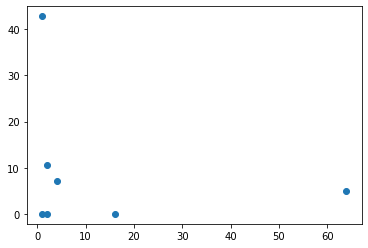

In [69]:
plt.scatter(Data_write[3:10,0], Data_write[3:10,1])

In [73]:
mask_sequential = Data_write[:,-1]==0
Data_parallel = Data_write[~mask_sequential]
Data_sequential = Data_write[mask_sequential]

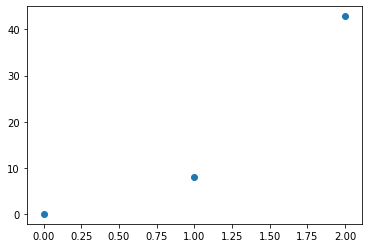

In [80]:
plt.scatter(Data_sequential[:,2], Data_sequential[:,1])

In [82]:
Data_parallel_small = Data_parallel[Data_parallel[:,2]==0]
Data_parallel_medium = Data_parallel[Data_parallel[:,2]==1]
Data_parallel_large = Data_parallel[Data_parallel[:,2]==2]

In [91]:
mask1_small

array([False,  True, False, False, False, False, False])

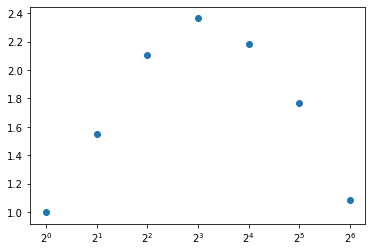

In [99]:
mask1_small = Data_parallel_small[:,0]==1
plt.scatter(Data_parallel_small[:,0], Data_parallel_small[mask1_small,1]/Data_parallel_small[:,1])
plt.xscale('log', basex=2)

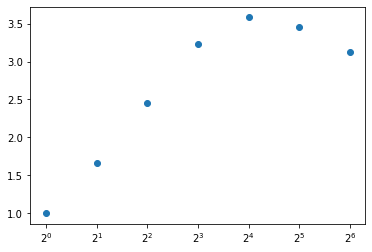

In [98]:
mask1_medium = Data_parallel_medium[:,0]==1
plt.scatter(Data_parallel_medium[:,0], Data_parallel_medium[mask1_medium,1]/Data_parallel_medium[:,1])
plt.xscale('log', basex=2)

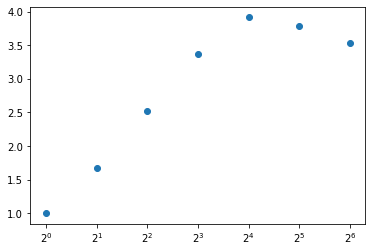

In [97]:
mask1_large = Data_parallel_large[:,0]==1
plt.scatter(Data_parallel_large[:,0], Data_parallel_large[mask1_large,1]/Data_parallel_large[:,1])
plt.xscale('log', basex=2)

In [101]:
#weak scaling

In [ ]:
np.argwhere( < 0)
plt.scatter(Data_parallel_large[:,0], Data_parallel_large[mask1_large,1]/Data_parallel_large[:,1])

In [105]:
small_size = 196*360
medium_size = 1964*3600
large_size = 3928*7200
large_size/medium_size, medium_size/small_size

(4.0, 100.20408163265306)